In [2]:
#import needed libraries
import pandas as pd
import numpy as np
from datetime import datetime
import time
import matplotlib.pyplot as plt
import math
import seaborn as sns
import altair as alt

In [3]:
#read in data from csv
land_data = pd.read_csv('DecentralandLandDataFinal.csv', index_col = 0)
land_data.head()

,id,sale price (MANA),timestamp,type,category,Estate Size,Date,adjacentRoadCount,MANA price (USD),ETH price (USD),sale price (USD),Closest Plaza,Dist to Plaza,Closest District,Dist to District,X,Y
0,1,100000.0,1539280016,order,estate,2,2018-10-11,0.0,0.074934,225.662016,7493.396964,SW Genesis,36.0,Fashion Street,88,-100,-107
1,2,100000.0,1539280356,order,estate,2,2018-10-11,0.0,0.074934,225.662016,7493.396964,SW Genesis,36.0,Fashion Street,88,-100,-107
2,3,32000.0,1539287969,order,parcel,1,2018-10-11,0.0,0.074934,225.662016,2397.887029,N Genesis,61.0,Vegas City,4,-70,145
3,4,30000.0,1539329807,order,parcel,1,2018-10-12,0.0,0.067969,192.001084,2039.081627,C Genesis,18.0,Bittrex Tomorrow,29,-27,-21
4,5,15000.0,1539334568,order,parcel,1,2018-10-12,0.0,0.067969,192.001084,1019.540813,E Genesis,19.0,Dragon City,11,65,-28


In [4]:
def find_r_theta(data):
    """This function converts cartesian coordinates to polar coordinates :
    ------------
    data: This function will be used in a df.apply and each row of the df will sent through
    this function
    return:
    -------
    the r and theta for the polar coordinates
    """
    #calculate r
    r = math.sqrt(data['X']**2+data['Y']**2)
    
    #calculate theta, if x is 0, special case
    if data['X'] == 0:
        if data['Y'] > 0: 
            theta = math.pi/2
        elif data['Y'] < 0:
            theta = -1*math.pi/2
        else: 
            theta = 0
    #if x not 0, then calculate theta
    else:
        theta = math.atan(data['Y']/data['X'])
    
    return r, theta

In [5]:
#calculate r and theta, set types, and extract other date columns
land_data.dtypes
land_data[['r','theta']] = land_data.apply(find_r_theta, axis = 1, result_type = 'expand')
land_data["Date"] = land_data["Date"].astype('datetime64[ns]')
land_data.dtypes
land_data['year'] = land_data['Date'].dt.year
land_data['month'] = land_data['Date'].dt.month
land_data['quarter'] = land_data['Date'].dt.quarter
land_data['Q Y'] = land_data['year'].map(str) + ' Q' + land_data['quarter'].map(str)
land_data['sale price (USD) per parcel'] = land_data['sale price (USD)']/land_data['Estate Size']

#land_data['year'] = pd.DatetimeIndex(land_data['Date']).year
land_data.head()

,id,sale price (MANA),timestamp,type,category,Estate Size,Date,adjacentRoadCount,MANA price (USD),ETH price (USD),...,Dist to District,X,Y,r,theta,year,month,quarter,Q Y,sale price (USD) per parcel
0,1,100000.0,1539280016,order,estate,2,2018-10-11,0.0,0.074934,225.662016,...,88,-100,-107,146.454771,0.819202,2018,10,4,2018 Q4,3746.698482
1,2,100000.0,1539280356,order,estate,2,2018-10-11,0.0,0.074934,225.662016,...,88,-100,-107,146.454771,0.819202,2018,10,4,2018 Q4,3746.698482
2,3,32000.0,1539287969,order,parcel,1,2018-10-11,0.0,0.074934,225.662016,...,4,-70,145,161.012422,-1.121037,2018,10,4,2018 Q4,2397.887029
3,4,30000.0,1539329807,order,parcel,1,2018-10-12,0.0,0.067969,192.001084,...,29,-27,-21,34.205263,0.661043,2018,10,4,2018 Q4,2039.081627
4,5,15000.0,1539334568,order,parcel,1,2018-10-12,0.0,0.067969,192.001084,...,11,65,-28,70.774289,-0.406747,2018,10,4,2018 Q4,1019.540813


In [6]:
#round price to 2 decimals
land_data['sale price (USD) per parcel'] = round(land_data['sale price (USD) per parcel'],2)
land_data.head()

,id,sale price (MANA),timestamp,type,category,Estate Size,Date,adjacentRoadCount,MANA price (USD),ETH price (USD),...,Dist to District,X,Y,r,theta,year,month,quarter,Q Y,sale price (USD) per parcel
0,1,100000.0,1539280016,order,estate,2,2018-10-11,0.0,0.074934,225.662016,...,88,-100,-107,146.454771,0.819202,2018,10,4,2018 Q4,3746.70
1,2,100000.0,1539280356,order,estate,2,2018-10-11,0.0,0.074934,225.662016,...,88,-100,-107,146.454771,0.819202,2018,10,4,2018 Q4,3746.70
2,3,32000.0,1539287969,order,parcel,1,2018-10-11,0.0,0.074934,225.662016,...,4,-70,145,161.012422,-1.121037,2018,10,4,2018 Q4,2397.89
3,4,30000.0,1539329807,order,parcel,1,2018-10-12,0.0,0.067969,192.001084,...,29,-27,-21,34.205263,0.661043,2018,10,4,2018 Q4,2039.08
4,5,15000.0,1539334568,order,parcel,1,2018-10-12,0.0,0.067969,192.001084,...,11,65,-28,70.774289,-0.406747,2018,10,4,2018 Q4,1019.54


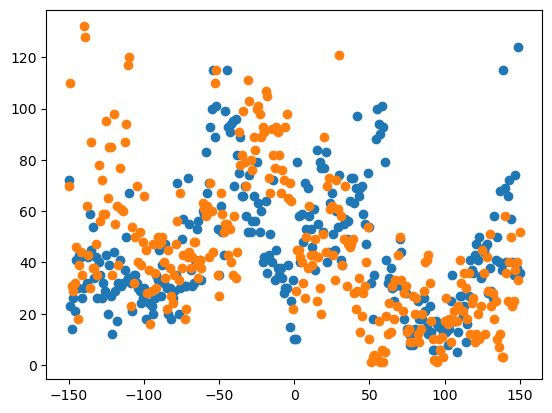

In [7]:
#check counts of x and y and plot them to see if any pattern
X_counts = land_data['X'].value_counts()
X_x = X_counts.index
X_counts = X_counts.values
plt.scatter(X_x,X_counts)
Y_y = land_data['Y'].value_counts().index
Y_counts = land_data['Y'].value_counts().values
plt.scatter(Y_y,Y_counts)

parcel    0.873499
estate    0.126501
Name: category, dtype: float64
20.0    0.038860
19.0    0.036996
18.0    0.030357
17.0    0.028343
16.0    0.026702
          ...   
67.0    0.001492
63.0    0.001492
2.0     0.001492
65.0    0.000895
66.0    0.000820
Name: Dist to Plaza, Length: 78, dtype: float64


array([[<Axes: title={'center': 'Dist to Plaza'}>]], dtype=object)

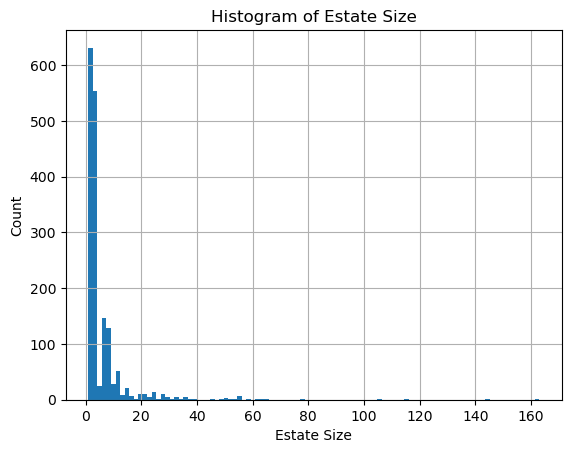

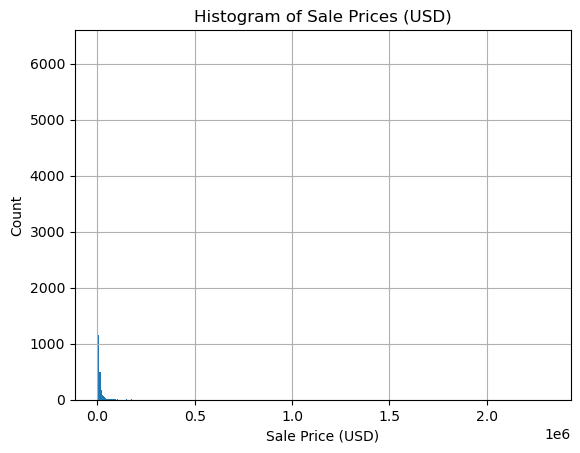

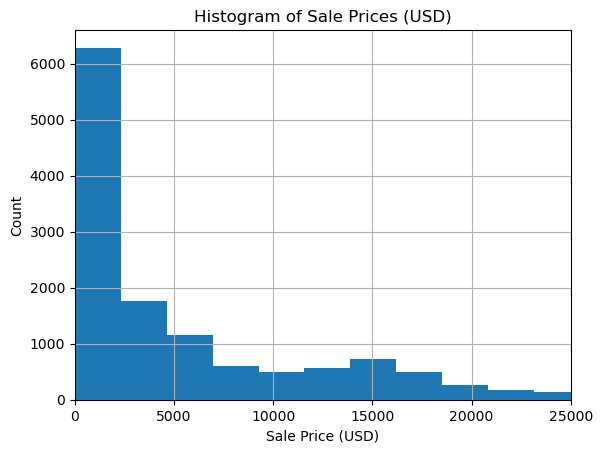

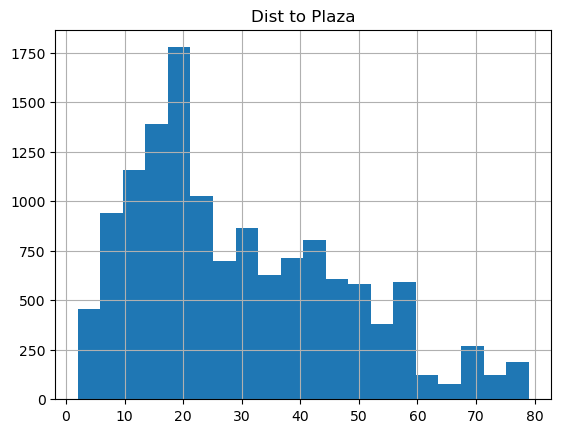

In [8]:
#statistical analysis
print(land_data['category'].value_counts()/land_data.shape[0])

#get just estate data, and plot histogram of estate size
estate_data = land_data[land_data['category'] == 'estate']
estate_data.hist(column = 'Estate Size', bins = 100)
plt.title('Histogram of Estate Size')
plt.xlabel('Estate Size')
plt.ylabel('Count')

#plot hist of sale price
print(land_data['Dist to Plaza'].value_counts()/land_data.shape[0])
land_data.hist(column = 'sale price (USD)', bins = 1000)
plt.title('Histogram of Sale Prices (USD)')
plt.xlabel('Sale Price (USD)')
plt.ylabel('Count')

#plot hist of sale price with x axis cutoff at 25,000
land_data.hist(column = 'sale price (USD)', bins = 1000)
plt.title('Histogram of Sale Prices (USD)')
plt.xlabel('Sale Price (USD)')
plt.ylabel('Count')
plt.xlim([0,25000])
#plt.ylim([0,10000])

#plot hist of dist to plaza
#sns.histplot(land_data['sale price (USD)'],stat="probability")
land_data.hist(column = 'Dist to Plaza', bins = 20)


array([[<Axes: title={'center': 'Dist to District'}>]], dtype=object)

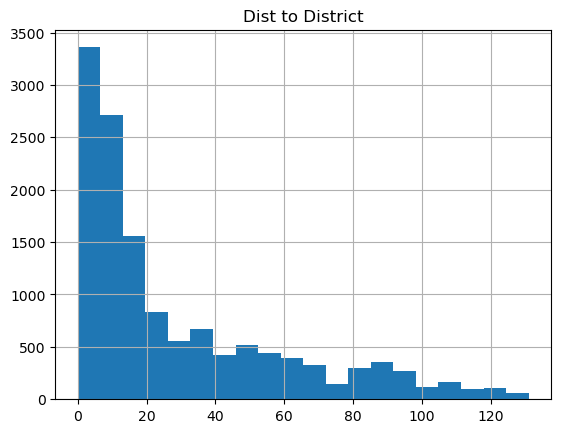

In [9]:
land_data.hist(column = 'Dist to District', bins = 20)

In [10]:
#get sale price totals by year, averag by year
by_year_total = land_data.groupby(land_data['year']).agg({"sale price (USD)" : "sum"})
by_year_ave = land_data.groupby(land_data['year']).agg({"sale price (USD)" : "mean"})
by_year_total
print(by_year_ave)

#get total and average sale prices per parcel
per_parcel_by_year_total = land_data.groupby(land_data['year']).agg({"sale price (USD) per parcel" : "sum"})
per_parcel_by_year_ave = land_data.groupby(land_data['year']).agg({"sale price (USD) per parcel" : "mean"})
print(per_parcel_by_year_ave)

#get ave sale price per parcel by quarter
per_parcel_by_quarter_ave = land_data.groupby(land_data['Q Y'], as_index = False).agg({"sale price (USD) per parcel" : "mean"})
print(per_parcel_by_quarter_ave)

#get num of sales by quarter
num_sales_by_quarter = land_data.groupby(land_data['Q Y'], as_index = False).agg({"id" : "count"})
print(num_sales_by_quarter)
num_sales_by_quarter_2 = land_data['Q Y'].value_counts()
print(num_sales_by_quarter_2)

      sale price (USD)
year                  
2018       1734.425596
2019       1216.358381
2020       1465.032704
2021      16549.520410
2022      20917.006980
2023       4989.544953
      sale price (USD) per parcel
year                             
2018                  1257.617025
2019                   831.635546
2020                   957.446657
2021                 10321.709565
2022                 10801.247322
2023                  2477.499774
        Q Y  sale price (USD) per parcel
0   2018 Q4                  1257.617025
1   2019 Q1                   854.842297
2   2019 Q2                   955.883703
3   2019 Q3                   848.800388
4   2019 Q4                   568.738753
5   2020 Q1                  1023.184668
6   2020 Q2                   694.142343
7   2020 Q3                  1042.689577
8   2020 Q4                   969.707992
9   2021 Q1                  4634.881970
10  2021 Q2                  7068.054921
11  2021 Q3                  5643.599426
12  2021 Q4

<Axes: xlabel='Q Y'>

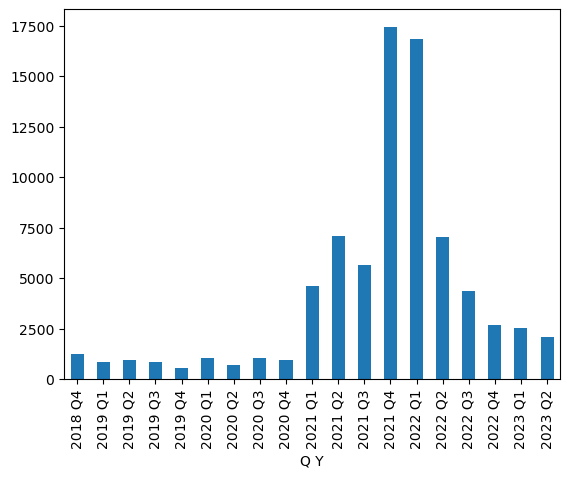

In [11]:
#plot averag sale price per parcel by quarter
land_data.groupby(land_data['Q Y']).agg({"sale price (USD) per parcel" : "mean"}).plot.bar(legend=False)

<Axes: xlabel='year'>

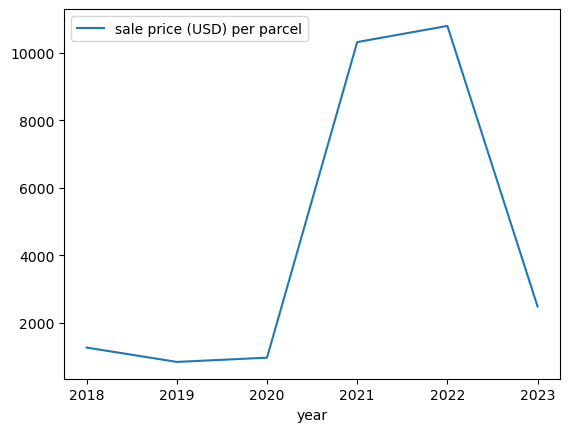

In [12]:
#plot averag sale price per parcel by quarter
per_parcel_by_year_ave.plot()

Text(0.5, 1.0, 'Decentraland Land Sales')

<Figure size 640x480 with 0 Axes>

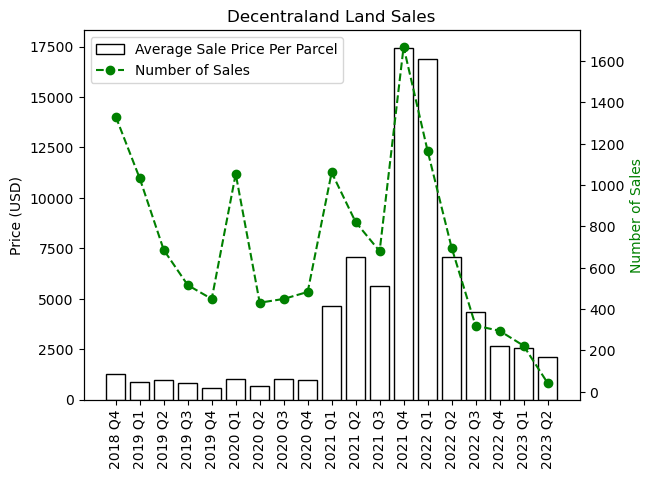

In [13]:
#plot average sale price per parcel and number of sales both by quarter on same figure
plt.figure();
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.bar(per_parcel_by_quarter_ave.iloc[:,0],per_parcel_by_quarter_ave.iloc[:,1], label = 'Average Sale Price Per Parcel',
       fill = False)
ax2.plot(num_sales_by_quarter.iloc[:,0],num_sales_by_quarter.iloc[:,1],'g--', marker = 'o', label = 'Number of Sales')
ax1.set_ylabel('Price (USD)')
ax2.set_ylabel('Number of Sales', color = 'g')
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines+lines2,labels+labels2)
#ax1.set_xticklabels(ax1.get_xticks(), rotation = 90)
ax1.tick_params(axis = 'x', labelrotation = 90)
plt.title('Decentraland Land Sales')

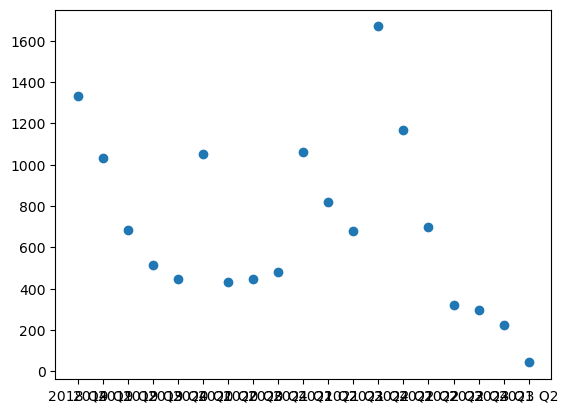

In [14]:
#scatter plot num of sale by quarter
plt.scatter(num_sales_by_quarter.iloc[:,0],num_sales_by_quarter.iloc[:,1])

In [15]:

alt.data_transformers.enable('json')

DataTransformerRegistry.enable('json')

In [17]:
#filtering using dynamic queries. 
selection = alt.selection(type="multi", fields=["Closest Plaza"])

#Create a container for two different views
base =  alt.Chart(land_data).properties(width=w, height=h)

# specify our overview chart
overview = alt.Chart(land_data).mark_bar().encode(
    y = "mean(sale price (USD) per parcel)",
    x = "Closest Plaza",
    color=alt.condition(selection, alt.value("orange"), alt.value("lightgrey"))
).add_selection(selection).properties(height=h, width=w/2)

# Create a detail chart
detail = base.mark_point().encode(
    y = "mean(sale price (USD) per parcel)", 
    x = "Dist to Plaza"
).transform_filter(selection).properties(height=h, width=w/2)

overview | detail

alt.HConcatChart(...)

In [18]:
#filtering using dynamic queries. 
selection = alt.selection(type="multi", fields=["Closest Plaza"], bind='legend')

# Create a detail chart
base.mark_circle().encode(
    y = "mean(sale price (USD) per parcel)", 
    x = "Dist to Plaza",
    color = "Closest Plaza",
     opacity=alt.condition(selection,alt.value(1),alt.value(.2))
).add_selection(selection).properties(height=600, width=600)

alt.Chart(...)

In [19]:
#filtering using dynamic queries. 
selection = alt.selection(type="multi", fields=["Closest Plaza"], bind='legend')

# Create a detail chart
base.mark_circle().encode(
    y = "mean(sale price (USD) per parcel)", 
    x = "Estate Size",
    color = "Closest Plaza",
     opacity=alt.condition(selection,alt.value(1),alt.value(.2))
).add_selection(selection).properties(height=600, width=600)

alt.Chart(...)

In [20]:
# Implementing selection
selection = alt.selection(type='multi', fields=['Closest Plaza'])

alt.Chart(land_data).mark_circle().encode(
    x = "Dist to Plaza",
    y = "mean(sale price (USD) per parcel)",
    color=alt.Color('Closest Plaza', scale=alt.Scale(scheme='spectral')),
    size= alt.Size("Estate Size", scale =alt.Scale(domain = (0,50))),
    #size="Estate Size",
    tooltip=["Closest Plaza", "Dist to Plaza","Estate Size", "X", "Y"],
    opacity=alt.condition(selection,alt.value(1),alt.value(.2))
).add_selection(selection).properties(width=750, height=500)

alt.Chart(...)

In [21]:
# Implementing selection
selection = alt.selection(type='multi', fields=['Closest Plaza'])

alt.Chart(land_data).mark_circle().encode(
    x = "r",
    y = "mean(sale price (USD) per parcel)",
    color=alt.Color('Closest Plaza', scale=alt.Scale(scheme='spectral')),
    #size="Estate Size",
    tooltip=["Closest Plaza", "Dist to Plaza","Estate Size"],
    opacity=alt.condition(selection,alt.value(1),alt.value(.2))
).add_selection(selection).properties(width=750, height=500)

alt.Chart(...)

In [22]:
# Implementing selection
selection = alt.selection(type='multi', fields=['Closest Plaza'])

alt.Chart(land_data).mark_circle().encode(
    x = "Estate Size",
    y = "mean(sale price (USD))",
    color=alt.Color('Closest Plaza', scale=alt.Scale(scheme='spectral')),
    #size="Estate Size",
    tooltip=["Closest Plaza", "Dist to Plaza","Estate Size"],
    opacity=alt.condition(selection,alt.value(1),alt.value(.2))
).add_selection(selection).properties(width=750, height=500).interactive()

alt.Chart(...)

In [23]:
#filtering using dynamic queries. 
selection = alt.selection(type="multi", fields=["Closest Plaza"])

# Create a container for two different views
base =  alt.Chart(land_data).properties(width=700, height=350)

# Let's specify our overview chart
overview1 = alt.Chart(land_data).mark_bar().encode(
    y = "mean(sale price (USD) per parcel)",
    x = "Closest Plaza",
    color=alt.condition(selection, alt.value("orange"), alt.value("lightgrey"))
).add_selection(selection).properties(height=350, width=350)

overview2 = alt.Chart(land_data).mark_line().encode(
    alt.Y("count(sale price (USD) per parcel)", axis=alt.Axis(title='Number of Sales', titleColor='#5276A7')),
    x = "Closest Plaza"
    #color=alt.condition(selection, alt.value("orange"), alt.value("lightgrey"))
)
#).add_selection(selection).properties(height=250, width=250)

#create overiewall with both overviews on one chart
overviewall = alt.layer(overview1, overview2).resolve_scale(
    y='independent'
)

# Create a detail chart
detail = base.mark_point().encode(
    y = "mean(sale price (USD) per parcel)", 
    x = "Dist to Plaza"
).transform_filter(selection).properties(height=350, width=350)

overview1 | detail

alt.HConcatChart(...)

In [24]:
#filtering using dynamic queries. 
selection = alt.selection(type="multi", fields=["Closest Plaza"])

# Create a container for two different views
base =  alt.Chart(land_data).properties(width=500, height=250)

# Let's specify our overview chart
overview = alt.Chart(land_data).mark_bar().encode(
    y = "mean(sale price (USD) per parcel)",
    x = "Closest Plaza",
    color=alt.condition(selection, alt.value("orange"), alt.value("lightgrey"))
).add_selection(selection).properties(height=250, width=250)

# Create a detail chart
detail = hist = base.mark_point().encode(
    y = "mean(sale price (USD) per parcel)", 
    x = "Q Y"
).transform_filter(selection).properties(height=250, width=250)

overview | detail

alt.HConcatChart(...)

In [25]:
#filtering using dynamic queries. 
selection = alt.selection(type="multi", fields=["Q Y"])

# Create a container for our two different views
base =  alt.Chart(land_data).properties(width=500, height=250)

# Let's specify our overview chart
overview = alt.Chart(land_data).mark_bar().encode(
    y = "mean(sale price (USD) per parcel)",
    x = "Q Y",
    color=alt.condition(selection, alt.value("orange"), alt.value("lightgrey"))
).add_selection(selection).properties(height=250, width=250)

# Create a detail chart
detail = hist = base.mark_point().encode(
    y = "mean(sale price (USD) per parcel)", 
    x = "Closest Plaza"
).transform_filter(selection).properties(height=250, width=250)

overview | detail

alt.HConcatChart(...)

In [26]:
# Implementing selection
selection = alt.selection(type='multi', fields=['Closest Plaza'], bind='legend')

alt.Chart(land_data, title = "Average Sale Price Per Parcel By Quarter and Plaza").mark_circle().encode(
    x = alt.X("Q Y",title ='Year Quarter'),
    y = alt.Y("mean(sale price (USD) per parcel)", title = "Average sale price per parcel (USD)"),
    color='Closest Plaza',
    size = alt.Size('count(sale price (USD) per parcel)',title = 'Number of Transactions'),
    #size="Estate Size",
    tooltip=["Closest Plaza", alt.Tooltip('mean(sale price (USD) per parcel)',format='.0f'),
             alt.Tooltip('count(sale price (USD) per parcel)', title = 'Number of Transactions')],
    opacity=alt.condition(selection,alt.value(1),alt.value(.2))
).add_selection(selection).interactive().properties(width=700, height=500)

alt.Chart(...)

In [27]:
# Create a new selection that uses my dynamic query widget
selection = alt.selection_single(fields=["Closest Plaza"], bind='legend')

# Let's specify our chart
alt.Chart(land_data).mark_circle().encode(
    x = "Dist to Plaza:Q",
    y = "mean(sale price (USD) per parcel):Q",
    color=alt.Color('Closest Plaza', scale=alt.Scale(scheme='spectral')),
   # size="Generosity",
    #tooltip=["Country", "Happiness Score"],
    opacity=alt.condition(selection,alt.value(1),alt.value(.2))
).add_selection(selection).properties(width=700, height=500)

alt.Chart(...)

In [28]:
# Let's specify our chart
alt.Chart(land_data).mark_circle().encode(
    x = "Dist to Plaza:Q",
    y = alt.Y("mean(sale price (USD) per parcel)", title = "Average sale price per parcel (USD)"),
    #color=alt.Color('year', scale=alt.Scale(scheme='spectral')),
   # size="Generosity",
    #tooltip=["Country", "Happiness Score"],
    #opacity=alt.condition(selection,alt.value(1),alt.value(.2))
).properties(width=300, height=300)

alt.Chart(...)

In [29]:

alt.Chart(land_data).mark_circle().encode(
    x = "r:Q",
    y = "mean(sale price (USD) per parcel):Q",
    #color=alt.Color('Closest Plaza', scale=alt.Scale(scheme='spectral')),
   # size="Generosity",
    #tooltip=["Country", "Happiness Score"],
    #opacity=alt.condition(selection,alt.value(1),alt.value(.2))
).properties(width=700, height=500)

alt.Chart(...)

In [30]:
alt.Chart(land_data).mark_circle().encode(
    x = "MANA price (USD)",
    y = alt.Y("mean(sale price (USD) per parcel)", title = "Average sale price per parcel (USD)"),
    #color='year:N',
    #color = 'Closest Plaza',
    #size="Estate Size",
    #tooltip=["Closest Plaza"],
    #opacity=alt.condition(selection,alt.value(1),alt.value(.2))
).interactive().properties(width=300, height=300)

alt.Chart(...)

In [31]:
alt.Chart(land_data).mark_circle().encode(
    x = "Estate Size",
    y = "mean(sale price (USD) per parcel)",
    #color='year:N',
    #color = 'Closest Plaza',
    #size="Estate Size",
    #tooltip=["Closest Plaza"],
    #opacity=alt.condition(selection,alt.value(1),alt.value(.2))
).interactive().properties(width=300, height=300)

alt.Chart(...)

In [32]:

alt.Chart(land_data).mark_circle().encode(
    x = "Dist to Plaza",
    y = "mean(sale price (USD) per parcel)",
    color='year:N',
    #size="Estate Size",
    #tooltip=["Closest Plaza"],
    #opacity=alt.condition(selection,alt.value(1),alt.value(.2))
).interactive().properties(width=750, height=500)

alt.Chart(...)

In [33]:

alt.Chart(land_data).mark_boxplot(clip = True).encode(
    alt.Y("sale price (USD) per parcel", scale=alt.Scale(domain=(0, 50000))),
    x = "Closest Plaza",
    
    #color='Closest Plaza',
    #size="Estate Size",
    #tooltip=["Closest Plaza"],
    #opacity=alt.condition(selection,alt.value(1),alt.value(.2))
).properties(width=750, height=500)

alt.Chart(...)

In [34]:
alt.Chart(land_data).mark_boxplot(clip = True).encode(
    alt.Y("sale price (USD) per parcel", scale=alt.Scale(domain=(0, 50000))),
    x = "Closest District",
    
    #color='Closest Plaza',
    #size="Estate Size",
    #tooltip=["Closest Plaza"],
    #opacity=alt.condition(selection,alt.value(1),alt.value(.2))
).properties(width=750, height=500)

alt.Chart(...)

In [35]:
#read in plaza and district data
plaza_data = pd.read_csv('DecentralandLandPlazaPts.csv', index_col = 0)
district_data = pd.read_csv('DecentralandLandDataDistrictPts.csv', index_col = 0)

#rename columns
plaza_data.rename(columns = {'x':'X', 'y':'Y', 'label':'Plaza'}, inplace = True)
district_data.rename(columns = {'x':'X', 'y':'Y', 'name':'District'}, inplace = True)

#read in road data
road_data = pd.read_csv('DecentralandLandRoadPts.csv', index_col = 0)

road_data.rename(columns = {'x':'X', 'y':'Y'}, inplace = True)

plaza_data.head()
district_data.head()
road_data.head()


,X,Y,Label
0,-99,-29,Road
1,-94,-29,Road
2,-93,-29,Road
3,-90,-29,Road
4,-89,-29,Road


In [36]:
#make map of decentraland with districts, plazas, roads, and sales with dropdown filter
All = None
input_dropdown = alt.binding_select(options=[All,2018, 2019, 2020, 2021, 2022,2023], name="Year ")
selection = alt.selection_single(fields=["year"], bind=input_dropdown)

sales = alt.Chart(land_data, title = "Decentraland Land Sales").mark_circle(clip = True).encode(
    alt.Y("Y", scale=alt.Scale(domain=(-150, 150))),
    alt.X("X", scale=alt.Scale(domain=(-150, 150))),
    #x = "X",
    #y = "Y",
    #color=alt.Color("sale price (USD) per parcel", scale=alt.Scale(scheme='spectral',domain = (0,25000))),
    color = alt.Color("sale price (USD) per parcel",scale=alt.Scale(domain = (0,25000))),
    #color='Closest Plaza',
    #size= alt.Size("Estate Size", scale =alt.Scale(domain = (0,50)))
    tooltip=["Date", "sale price (USD) per parcel", "Estate Size"],
    #opacity=alt.condition(selection,alt.value(1),alt.value(.2))
).add_selection(selection).transform_filter(selection).properties(width=600, height=600).interactive()
    #f"({selection.year}[0] == 'All') || ({selection.year}[0] == datum.year))")


plazapts = alt.Chart(plaza_data).mark_circle(color = 'green', opacity = .1).encode(
    x = "X:Q",
    y = "Y:Q",
    #color = "lightgray"
)

districtpts = alt.Chart(district_data).mark_circle(color = 'purple', opacity = .1).encode(
    x = "X:Q",
    y = "Y:Q",
    tooltip=["District"],
    #color = "lightgray"
)

roadpts = alt.Chart(road_data).mark_circle(color = 'grey', opacity = .9).encode(
    x = "X:Q",
    y = "Y:Q",
    tooltip=["Label"],
    #color = "lightgray"
)

roadpts + districtpts + plazapts + sales
#sales

alt.LayerChart(...)

In [37]:
#make map of decentraland with districts, plazas, roads, and sales with year filter
#interactive figure

selection = alt.selection_multi(fields = ['year'])
color = alt.condition(selection, alt.Color('year:N', legend = None), alt.value('lightgray'))
make_selector = alt.Chart(land_data).mark_rect().encode(y=alt.Y('year:N',title = 'Filter by Year'), color = color).add_selection(selection)

sales = alt.Chart(land_data, title = "Decentraland Land Sales").mark_circle(clip = True).encode(
    alt.Y("Y", scale=alt.Scale(domain=(-150, 150))),
    alt.X("X", scale=alt.Scale(domain=(-150, 150))),
    #x = "X",
    #y = "Y",
    color = alt.Color("sale price (USD) per parcel",scale=alt.Scale(domain = (0,25000)),
                      title = "sale price per parcel (USD)"),
    #color='Closest Plaza',
    #size= alt.Size("Estate Size", scale =alt.Scale(domain = (0,50)))
    tooltip=["Date", "Closest Plaza", "Closest District", 
             alt.Tooltip("sale price (USD) per parcel", title = "sale price per parcel (USD)"), "Estate Size"],
    #opacity=alt.condition(selection,alt.value(1),alt.value(.2))
).properties(width=600, height=600).interactive().transform_filter(selection)
    #f"({selection.year}[0] == 'All') || ({selection.year}[0] == datum.year))")


plazapts = alt.Chart(plaza_data).mark_circle(color = 'green', opacity = .1).encode(
    x = "X:Q",
    y = "Y:Q",
    tooltip =["Plaza"]
    #color = "lightgray"
)

districtpts = alt.Chart(district_data).mark_circle(color = 'purple', opacity = .1).encode(
    x = "X:Q",
    y = "Y:Q",
    tooltip=["District"],
    #color = "lightgray"
)

roadpts = alt.Chart(road_data).mark_circle(color = 'grey', opacity = .9, size = 5).encode(
    x = "X:Q",
    y = "Y:Q",
    tooltip=["Label"],
    #color = "lightgray"
)

make_selector |  districtpts + plazapts + roadpts + sales 

alt.HConcatChart(...)

In [38]:
#make map of decentraland with districts, plazas, roads, and sales with slider filter for sales
#interactive figure

slider = alt.binding_range(min=0,max=50000,step = 10, name='Show sales with a per parcel price (USD) greater than:')

selection = alt.selection_single(fields = ["sale price (USD) per parcel"], bind= slider,
                                init={"sale price (USD) per parcel": 0})
#color = alt.condition(selection, alt.Color('year:N', legend = None), alt.value('lightgray'))
#make_selector = alt.Chart(land_data).mark_rect().encode(y='year:N', color = color).add_selection(selection)

sales = alt.Chart(land_data, title = "Decentraland Land Sales").mark_circle(clip = True).encode(
    alt.Y("Y", scale=alt.Scale(domain=(-150, 150))),
    alt.X("X", scale=alt.Scale(domain=(-150, 150))),
    #x = "X",
    #y = "Y",
    color = alt.Color("sale price (USD) per parcel",scale=alt.Scale(domain = (0,25000))),
    #color='Closest Plaza',
    #size= alt.Size("Estate Size", scale =alt.Scale(domain = (0,50))),
    tooltip=["Date", "Closest Plaza", "Closest District", "sale price (USD) per parcel", "Estate Size"],
    #opacity=alt.condition(selection,alt.value(1),alt.value(.2))
).properties(width=500, height=500).interactive().add_selection(selection).transform_filter(alt.datum['sale price (USD) per parcel'] > selection['sale price (USD) per parcel'])
    #f"({selection.year}[0] == 'All') || ({selection.year}[0] == datum.year))")


plazapts = alt.Chart(plaza_data).mark_circle(color = 'green', opacity = .1).encode(
    x = "X:Q",
    y = "Y:Q",
    tooltip =["Plaza"]
    #color = "lightgray"
)

districtpts = alt.Chart(district_data).mark_circle(color = 'purple', opacity = .1).encode(
    x = "X:Q",
    y = "Y:Q",
    tooltip=["District"],
    #color = "lightgray"
)



districtpts + plazapts + roadpts + sales 

alt.LayerChart(...)

In [40]:
np.max(land_data["sale price (USD) per parcel"])

434811.37